## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
(X.dtypes == "object").values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

Пропущенных значений и категориальных переменных нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

arr = [1, 3, 5, 10, 15, 25]
indexes = ['alcohol', 'magnesium']
X_train_knn = X_train[indexes]
X_test_knn = X_test[indexes]

scaler = StandardScaler()
scaler.fit(X_train_knn)
X_train_knn = scaler.transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

df = []
clf_list = []
for k in arr:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train_knn, y_train)
  df.append(pd.DataFrame({'NN': k, 'Train': np.mean(y_train == clf.predict(X_train_knn)), 'Test': np.mean(y_test == clf.predict(X_test_knn))}, index=[0]))
  clf_list.append(clf)
pd.concat(df).reset_index(drop=True)

,NN,Train,Test
0,1,1.000000,0.629630
1,3,0.862903,0.648148
2,5,0.838710,0.666667
3,10,0.782258,0.666667
4,15,0.725806,0.629630
5,25,0.758065,0.722222


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

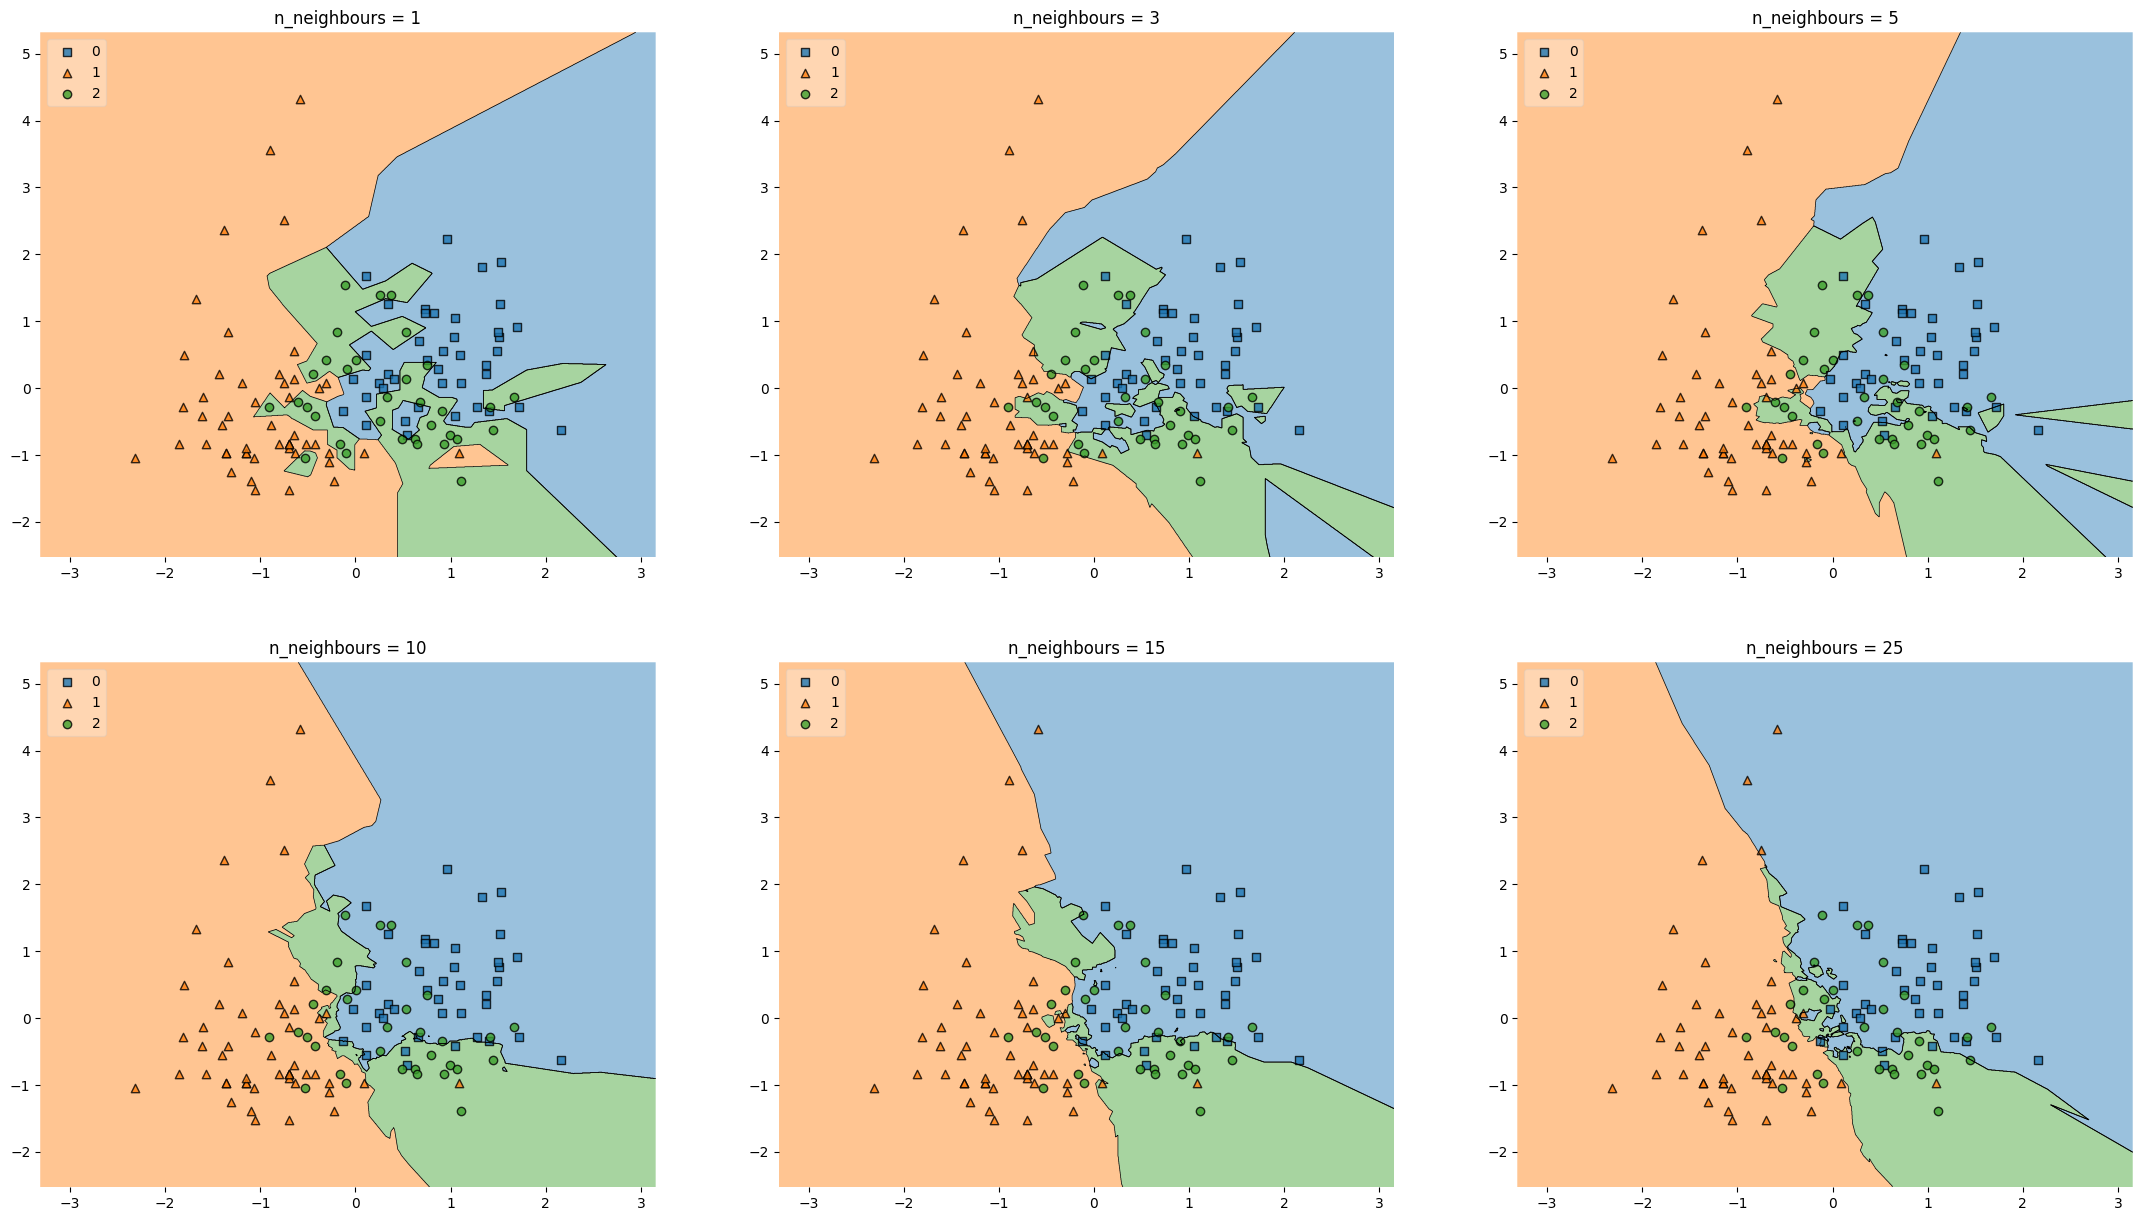

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(27,15))

arr = [1, 3, 5, 10, 15, 25]
labels = [f'n_neighbours = {i}' for i in arr]

for clf, lab, grd in zip(clf_list,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X_train_knn, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_knn, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Из 1.3 кажется, что максимальная точность при 25 соседях. По графикам видно, что на 1, 3, 5 соседях точно модель переобучается

Если сравнить результат на 10, 15, 25, то видно, что всегда у нас падает точность определения 2 вида вина, когда точность первых двух близка к 100% на 25
На графиках 10 или 15 выглядит более целостно, без мелких островков

Я бы использовала 10 или 25 (а вообще лучше проверять на валидационной выборке)

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

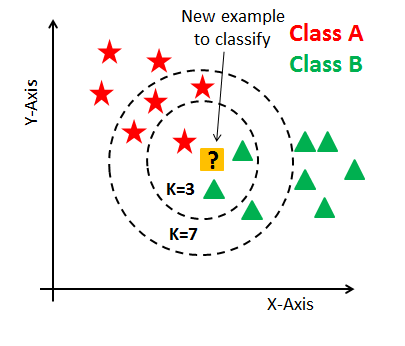

In [ ]:
import numpy as np
from collections import Counter
from functools import partial

# с трудом, но 0 циклов for, даже сокращённых для формирования списка
class KNN:
    def __init__(self, k:int):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = list(map(self._predict, X))
        return np.array(predicted_labels)

    def _predict(self, x):
        # фиксируем первый аргумент count_distance
        count_distance_partial = partial(self.count_distance, x)
        # применяем map к списку self.X_train
        distances = list(map(count_distance_partial, self.X_train))
        # находим индексы k ближайших соседей для каждой точки в X
        k_indices = np.argsort(distances)[:self.k]
        # получаем классы для k ближайших соседей
        k_nearest_labels = self.y_train[k_indices]
        # возвращаем наиболее часто встречающийся класс среди k ближайших соседей
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def count_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2))

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
# data = pd.read_csv('data/diamonds.csv')
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
data.drop(columns='Unnamed: 0', inplace=True)

**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

<ipython-input-63-4c5789e7aeb8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="vlag", annot=True, fmt="0.1f");


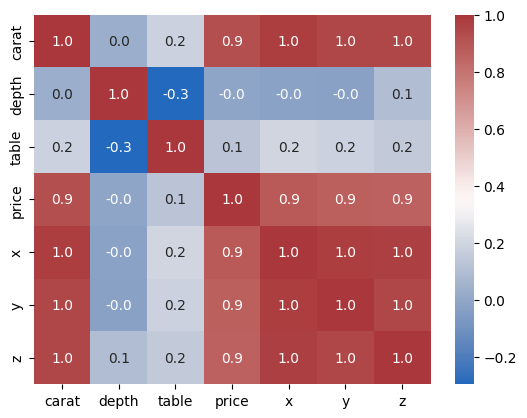

In [ ]:
import seaborn as sns

sns.heatmap(data.corr(), cmap="vlag", annot=True, fmt="0.1f");

Больше всего коррелируют размеры алмаза (x, y, z) и масса (carat), что в целом логично

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data = pd.get_dummies(data)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
X = data.drop(columns='price')
y = data[['price']]
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Использование stratify в данном случае некорректно, т к целевая переменная не категориальная

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train = pd.DataFrame(data=X_train_norm, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_norm, columns=X_test.columns)

X_train[:10]

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.476637,0.593828,-0.201072,0.665760,0.609753,0.714144,-0.174519,-0.316858,1.223948,-0.583202,...,-0.332558,-0.233550,-0.114427,5.371054,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
1,0.922237,-0.319016,-0.201072,1.068266,1.021402,1.002914,-0.174519,-0.316858,1.223948,-0.583202,...,-0.332558,-0.233550,-0.114427,5.371054,-0.565300,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
2,-0.563099,0.453390,0.699227,-0.488091,-0.464115,-0.426497,-0.174519,-0.316858,1.223948,-0.583202,...,-0.332558,-0.233550,-0.114427,-0.186183,1.768973,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
3,1.495153,0.804484,-0.651222,1.354492,1.433051,1.508261,-0.174519,-0.316858,-0.817028,-0.583202,...,-0.332558,-0.233550,-0.114427,-0.186183,1.768973,-0.453637,-0.420228,-0.543988,-0.271098,-0.321794
4,-0.202374,-0.108359,-0.201072,0.003861,-0.034568,-0.022219,-0.174519,-0.316858,1.223948,-0.583202,...,-0.332558,4.281744,-0.114427,-0.186183,-0.565300,2.204406,-0.420228,-0.543988,-0.271098,-0.321794
5,0.222007,0.453390,0.249077,0.316921,0.332337,0.382058,-0.174519,3.155984,-0.817028,-0.583202,...,-0.332558,-0.233550,-0.114427,-0.186183,-0.565300,-0.453637,-0.420228,1.838277,-0.271098,-0.321794
6,-0.605537,-1.372296,-1.101371,-0.497036,-0.446217,-0.614198,-0.174519,-0.316858,1.223948,-0.583202,...,-0.332558,-0.233550,-0.114427,-0.186183,-0.565300,2.204406,-0.420228,-0.543988,-0.271098,-0.321794
7,-0.881385,0.453390,-1.551520,-0.962154,-1.009998,-0.931845,-0.174519,-0.316858,1.223948,-0.583202,...,-0.332558,-0.233550,-0.114427,-0.186183,-0.565300,-0.453637,-0.420228,1.838277,-0.271098,-0.321794
8,0.434198,0.102297,-1.551520,0.612092,0.645548,0.641951,-0.174519,-0.316858,1.223948,-0.583202,...,-0.332558,4.281744,-0.114427,-0.186183,-0.565300,-0.453637,-0.420228,1.838277,-0.271098,-0.321794
9,2.577326,0.734265,0.249077,2.114781,2.032627,2.186870,-0.174519,-0.316858,-0.817028,1.714673,...,-0.332558,4.281744,-0.114427,-0.186183,-0.565300,2.204406,-0.420228,-0.543988,-0.271098,-0.321794


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

lr = LinearRegression().fit(X_train, y_train)
print(f"Train: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test))}")

Train: 1268454.955961559
Test: 1303126.748846737


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
coef = pd.DataFrame({"Feature":X_train.columns,"Coefficients":[round(coef, 2) for coef in lr.coef_.tolist()[0]]})
coef

,Feature,Coefficients
0,carat,5268.33
1,depth,-73.11
2,table,-67.59
3,x,-959.00
4,y,80.66
5,z,-238.04
6,cut_Fair,-128.35
7,cut_Good,-38.07
8,cut_Ideal,50.44
9,cut_Premium,15.65


Оценки карат и длины алмаза превышают на порядок остальные

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
lasso = Lasso(alpha=10).fit(X_train, y_train)
coef['lasso'] = [round(coef, 2) for coef in lasso.coef_.tolist()]

ridge = Ridge(alpha=10).fit(X_train, y_train)
coef['ridge'] = [round(coef, 2) for coef in ridge.coef_.tolist()[0]]

print(f"Train: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test))}")
print(f"Lasso Train: {mean_squared_error(y_train, lasso.predict(X_train))}")
print(f"Lasso Test: {mean_squared_error(y_test, lasso.predict(X_test))}")
print(f"Ridge Train: {mean_squared_error(y_train, ridge.predict(X_train))}")
print(f"Ridge Test: {mean_squared_error(y_test, ridge.predict(X_test))}")

coef

Train: 1268454.955961559
Test: 1303126.748846737
Lasso Train: 1278812.1475300759
Lasso Test: 1317822.9706476238
Ridge Train: 1268515.3045712388
Ridge Test: 1304060.154096785


,Feature,Coefficients,lasso,ridge
0,carat,5268.33,4837.34,5233.94
1,depth,-73.11,-42.00,-69.90
2,table,-67.59,-54.83,-67.35
3,x,-959.00,-459.99,-904.84
4,y,80.66,-0.00,70.67
5,z,-238.04,-246.41,-248.83
6,cut_Fair,-128.35,-130.40,-128.59
7,cut_Good,-38.07,-39.66,-38.14
8,cut_Ideal,50.44,40.36,50.49
9,cut_Premium,15.65,0.00,15.49


В целом MSE почти не изменилась, веса лишь немного уменьшились, что не говорит о сильной мультиколлинеарности. Но если посмотреть на коэффициенты Лассо-регрессии, можно заменить, что некоторые из них занулились, значит, видимо эти признаки как раз мультиколлинеарны с остальными

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.428e+08, tolerance: 5.933e+07
  model = cd_fast.enet_coordinate_descent(


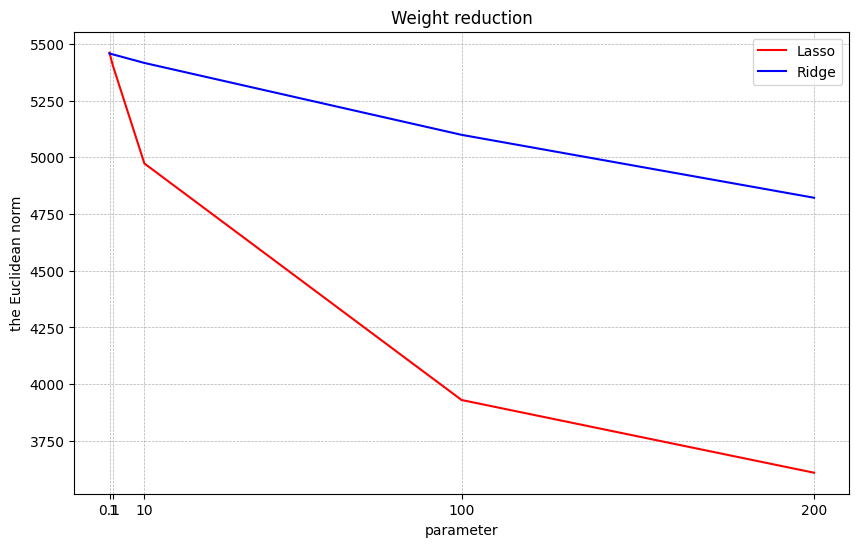

In [ ]:
arr = [0.1, 1, 10, 100, 200]
lasso_list = []
ridge_list = []

for i in arr:
  lasso = Lasso(alpha=i).fit(X_train, y_train)
  ridge = Ridge(alpha=i).fit(X_train, y_train)
  lasso_list.append(np.linalg.norm(lasso.coef_.tolist()))
  ridge_list.append(np.linalg.norm(ridge.coef_.tolist()[0]))

plt.figure(figsize=(10, 6))
plt.plot(arr, lasso_list, label='Lasso', color='red')
plt.plot(arr, ridge_list, label='Ridge', color='blue')

plt.legend()
plt.xlabel('parameter')
plt.ylabel('the Euclidean norm')
plt.title('Weight reduction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

xtick_labels = [str(i) for i in arr]
plt.xticks(arr, xtick_labels)

plt.show()

По данному графику очевидно, что Лассо-регрессия сильнее уменьшает веса (при этом теряет в точности при высоких значениях параметра, что видно из следующего задания). Также она зануляет признаки, которые либо не сильно влияют на результат, либо которые мультиколлинеарны с остальными, что уменьшает кол-во признаков, следовательно, облегчает модель, и помогает избавиться от мультиколлинеарности

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

lcv = LassoCV(cv=5, alphas=arr).fit(X_train, y_train)
mse = []
for i in range(len(lcv.mse_path_)):
    mse.append(np.mean(lcv.mse_path_[i]))
    print (f'При a = {lcv.alphas_[i]} средняя ошибка {mse[-1]}')

print(f'\nМинимальная ошибка = {min(mse)} достигается при a = {lcv.alphas_[np.where(mse == min(mse))][0]}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014354645.6532555, tolerance: 47234925.03802861
  model = cd_fast.enet_coordinate_descent_gram(


При a = 200.0 средняя ошибка 1937618.4671894982
При a = 100.0 средняя ошибка 1521694.2976032156
При a = 10.0 средняя ошибка 1282022.5727180324
При a = 1.0 средняя ошибка 1272417.9915216747
При a = 0.1 средняя ошибка 1272726.6219917457

Минимальная ошибка = 1272417.9915216747 достигается при a = 1.0


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test))}")

coef = pd.DataFrame({"Feature":X_train.columns,"Coefficients":[round(coef,2) for coef in lasso.coef_.tolist()]})
coef

Train: 1268666.150484931
Test: 1302110.3266390304


,Feature,Coefficients
0,carat,5227.68
1,depth,-73.19
2,table,-66.55
3,x,-860.89
4,y,0.00
5,z,-217.00
6,cut_Fair,-134.10
7,cut_Good,-46.53
8,cut_Ideal,34.98
9,cut_Premium,0.00


In [ ]:
data = pd.read_csv('diamonds.csv')
data.groupby('cut').x.count()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: x, dtype: int64

In [ ]:
data.groupby('color').x.count()

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: x, dtype: int64

In [ ]:
data.groupby('clarity').x.count()

clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
Name: x, dtype: int64

Хотела сказать, что веса зануляются, т к мало записей этой категории, оказалось, что наоборот) Это как раз самые многочисленные категории в данной выборке

Наиболее информативные - размер и караты, причём параметр у занулился, видимо из-за мультиколлинеарности


**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
print(f"Обычная линейная регрессия: {mean_squared_error(y_test, lr.predict(X_test))}")
print(f"Lasso-регрессия: {mean_squared_error(y_test, lasso.predict(X_test))}")

print(f"Разность ошибки: {mean_squared_error(y_test, lr.predict(X_test))-mean_squared_error(y_test, lasso.predict(X_test))}")

Обычная линейная регрессия: 1303126.748846737
Lasso-регрессия: 1302110.3266390304
Разность ошибки: 1016.4222077066079


В данном случае разница незначительна, так как проблема мультиколлинеарности выражена слабо. Кажется, что без особой разницы, которую модель использовать, но лучше Лассо, т к меньше веса и меньше кол-во признаков